In [56]:
#Zadanie 1

In [3]:
a = Float32(1/3)
b = Float64(1/3)

0.3333333333333333

In [4]:
bits(a)

"00111110101010101010101010101011"

In [5]:
bits(b)

"0011111111010101010101010101010101010101010101010101010101010101"

In [6]:
bits(Float64(a))

"0011111111010101010101010101010101100000000000000000000000000000"

In [ ]:
#Zadanie 2

In [7]:
Pkg.add("Gadfly")

INFO: Package Gadfly is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [14]:
using Gadfly
Gadfly.push_theme(:default)

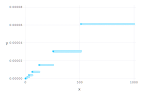

In [9]:
xAxis = Float32[]
yAxis = Float32[]
base = Float32(1.0)
for i = 1:1000
    push!(xAxis, base)
    push!(yAxis, eps(Float32(base)))
    base += 1
end
plot(x = xAxis, y = yAxis)

In [ ]:
#Zadanie 4

In [38]:
#function taken from exercises at university
decode(x::Float32) = (b=bits(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

('0', "01111111", "00000000000000000000000")

In [39]:
#=
    In this exercise I'd like to compare functions f(x, y) = x^2 - y^2 and g(x, y) = (x + y)*(x - y)
    Those are both same functions written in different ways [(x^2 - y^2) == (x + y)*(x - y)]
    But one of them is numeric stable and the other one isn't
    why is that? I'll explain it later, for now let's assume that (a + b)*(a - b) is stable
=#
f(a) = a*a
notOptimized(a, b) = f(a) - f(b)
isOptimized(a, b) = (a + b)*(a - b)

isOptimized (generic function with 1 method)

In [40]:
#What we need here is to create slight difference in number we'll work on
higherNumber(a) = nextfloat(Float32(a))
lowerNumber(a) = prevfloat(Float32(a))

lowerNumber (generic function with 1 method)

In [45]:
#One of them should be little higher
firstNumber = Float32(0.5)
firstNumber = higherNumber(firstNumber)

0.50000006f0

In [46]:
#And the other one little lower
secondNumber = Float32(1.5)
secondNumber = lowerNumber(secondNumber)

1.4999999f0

In [ ]:
#=
    Q&A
    Why one on them is higher than base number and the other one lower?
    - We need to create numbers with different aberration (one higher ['dirac delta' > 0], second lower 
        ['dirac delta' < 0])
=#

In [50]:
notOptimized(firstNumber, secondNumber)

-1.9999998f0

In [51]:
isOptimized(firstNumber, secondNumber)

-1.9999996f0

In [1]:
#=
    Ok, we've got results and... they are different.
    Let's check which one is more approximate
    To do this I'll change approximation from Float32 to Float64
=#
x = Float64(0.50000006)
y = Float64(1.4999999)
x^2 - y^2

-1.9999996400000062

In [ ]:
#=
    As we can see second function (x + y)*(x - y) is more appropiate (first one has 0.0000002 aberration 
    - about 0.00001%, while the second one is correct)
    So now let's dig into this:
    Assume that d is a measure of aberration (for example we'll have d0, d1 and d2 for 3 different aberrations)
    1. Elaborate f(x, y) = x^2 - y^2 function
        Here we'll have 3 aberrations:
            I: x^2(1 + d0) - aberration from multiplication [1 + d0 means that to result x^2 we need to add aberration 
                (x^2)*d0]
            II: y^2(1 + d1)
            III: _^2 - _^2(1 + d2) - aberration from substitution x^2 - y^2
        It all can be calculate into this:
            (x^2 - y^2)[1 + ((x^2)*d0 - (y^2)*d1)/(x^2 - y^2)*(1 + d2)]
            The most important part:
                (x^2)*d0 - (y^2)*d1
            means that if d0 and d1 are opposing numbers then aberration rises infinitely
            (that's why we took one little higher and one little lower number)
    2. Elaborate g(x, y) = (x + y)*(x - y) function
        Here we also have 3 aberrations:
            I: (x + y)(1 + d0)
            II: (x - y)(1 + d1)
            III: _*_(1 + d2)
        After calculation we got:
            (x^2 - y^2)[1 + d0 + d1 + d2 + d0d1 + d0d2 + d1d2 + d0d1d2]
            After getting rid of not important expressions:
                d0d1 + d0d2 + d1d2 + d0d1d2 (they all are so small that we can ignore it)
            We get: 
                (x^2 - y^2)[1 + d0 + d1 + d2] where d0 + d1 + d2 creates aberration equal to representation
=#